In [19]:
#Imports

import keras.backend as K
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16

import lucid.optvis.param as param
import lucid.optvis.transform as transform

from lucid4keras import prepare_model, keras_render_vis
from lucid4keras import objectives as keras_objectives

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np


K.clear_session()
model = InceptionV3()
model = prepare_model(model,layer_name="mixed0")

mixed0 <keras.layers.merge.Concatenate object at 0x7fe649505550> is a merge layer. will linearize connected relu containing layers
	linearizing layer: activation_6
	linearizing layer: activation_8
	linearizing layer: activation_11
	linearizing layer: activation_12


256 18.56407



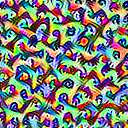

In [21]:
param_f = lambda: param.image(128)
images = keras_render_vis(model, 230, param_f,thresholds=[256])

In [12]:
a = np.random.randint(0,500,size=(10))
print(a)

[242 240 271  44 459  14 436 323 481 259]


10
400 90.55208



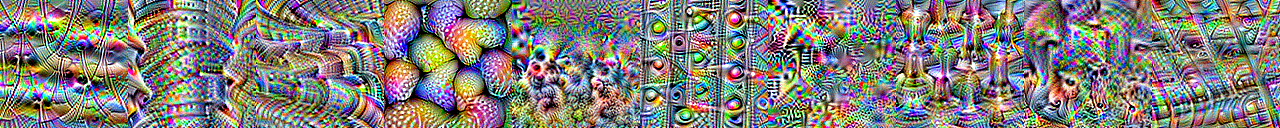

600 102.01771



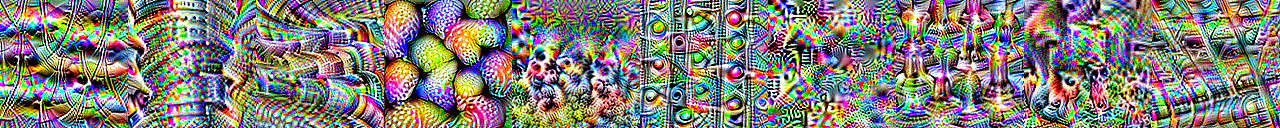

800 93.84131



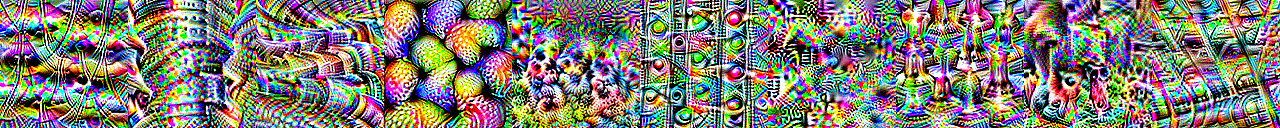

In [14]:
channel = lambda n,batch: keras_objectives.channel(n,batch)
obj = channel(0, batch=0)
for i,k in enumerate(a):
    obj += channel(k, batch = i)
print(obj.batch_n)
param_f = lambda: param.image(128)
images = keras_render_vis(model, obj, param_f,thresholds=[400,600,800])